In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [206]:
data=pd.read_csv('/content/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [207]:
data.shape

(344, 7)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [209]:
data.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [210]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [211]:
data.fillna({
    'culmen_length_mm':data['culmen_length_mm'].median(),
    'culmen_depth_mm':data['culmen_depth_mm'].median(),
    'flipper_length_mm':data.flipper_length_mm.median(),
    'body_mass_g':data.body_mass_g.median(),
    'sex': data['sex'].mode()[0]

},inplace=True)

In [212]:
data.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [213]:
data.head(9)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.30,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.90,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.20,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,MALE


In [214]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [215]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [216]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [217]:
x=data[data['sex'] == '.'].index

data.drop(x,inplace=True)


#Visualization


# 1) Univariate Analysis

In [218]:
data.sex.value_counts()

MALE      178
FEMALE    165
Name: sex, dtype: int64

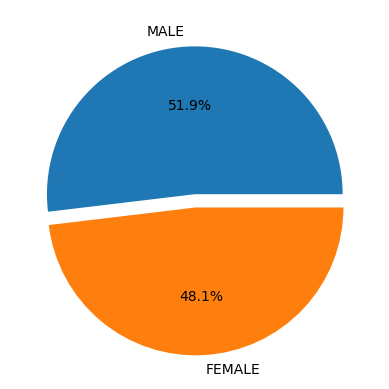

In [219]:
label=['MALE','FEMALE']
plt.pie(data['sex'].value_counts(),[0,0.09],labels=label,autopct = '%1.1f%%')
plt.show()

In [220]:
data['species'].value_counts()

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

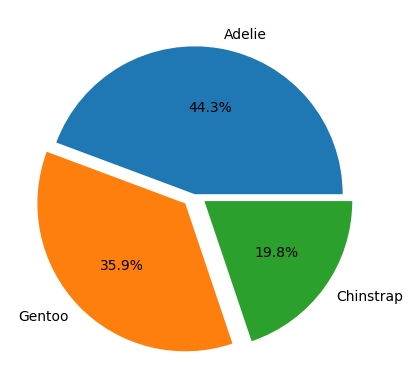

In [221]:
label=['Adelie','Gentoo',"Chinstrap"]
plt.pie(data['species'].value_counts(),[0,0.09,0.08],labels=label,autopct = '%1.1f%%')
plt.show()


In [222]:
label=['Torgersen']

Text(0.5, 1.0, 'culmen_depth_mm')

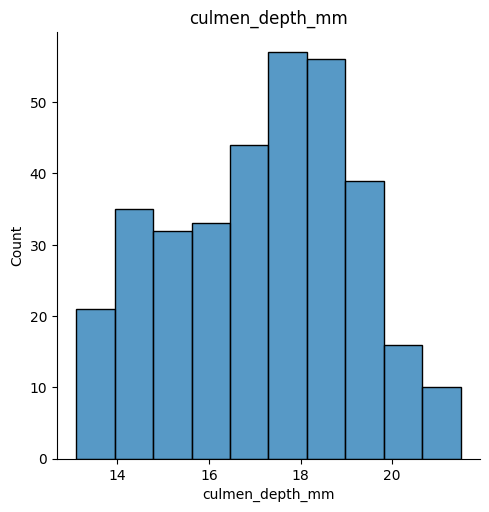

In [223]:
sn.displot(data['culmen_depth_mm'])
plt.title('culmen_depth_mm')

<ipython-input-224-f19028a3753a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['culmen_length_mm'])


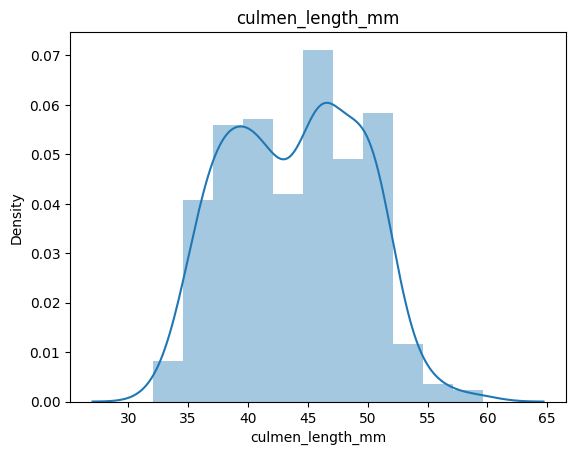

In [224]:
sn.distplot(data['culmen_length_mm'])
plt.title('culmen_length_mm')
plt.show()

In [225]:
data.corr()

<ipython-input-225-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.234963,0.656782,0.595293
culmen_depth_mm,-0.234963,1.000000,-0.582944,-0.470988
flipper_length_mm,0.656782,-0.582944,1.000000,0.870975
body_mass_g,0.595293,-0.470988,0.870975,1.000000


#BIVARIENT ANALYSIS

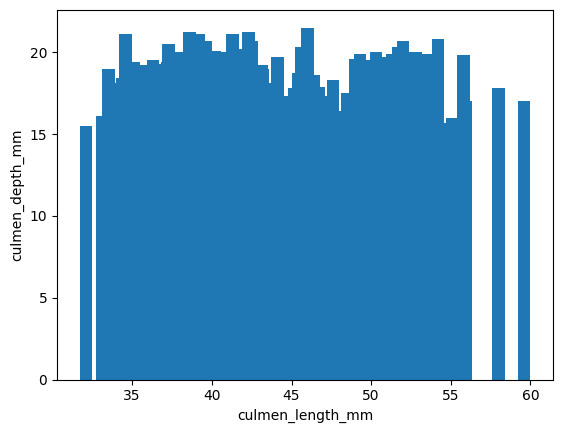

In [226]:
x=np.array(data['culmen_length_mm']).tolist()
y=np.array(data['culmen_depth_mm']).tolist()
plt.bar(x,y)
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.show()

# MULTIVARIENT ANALYSIS

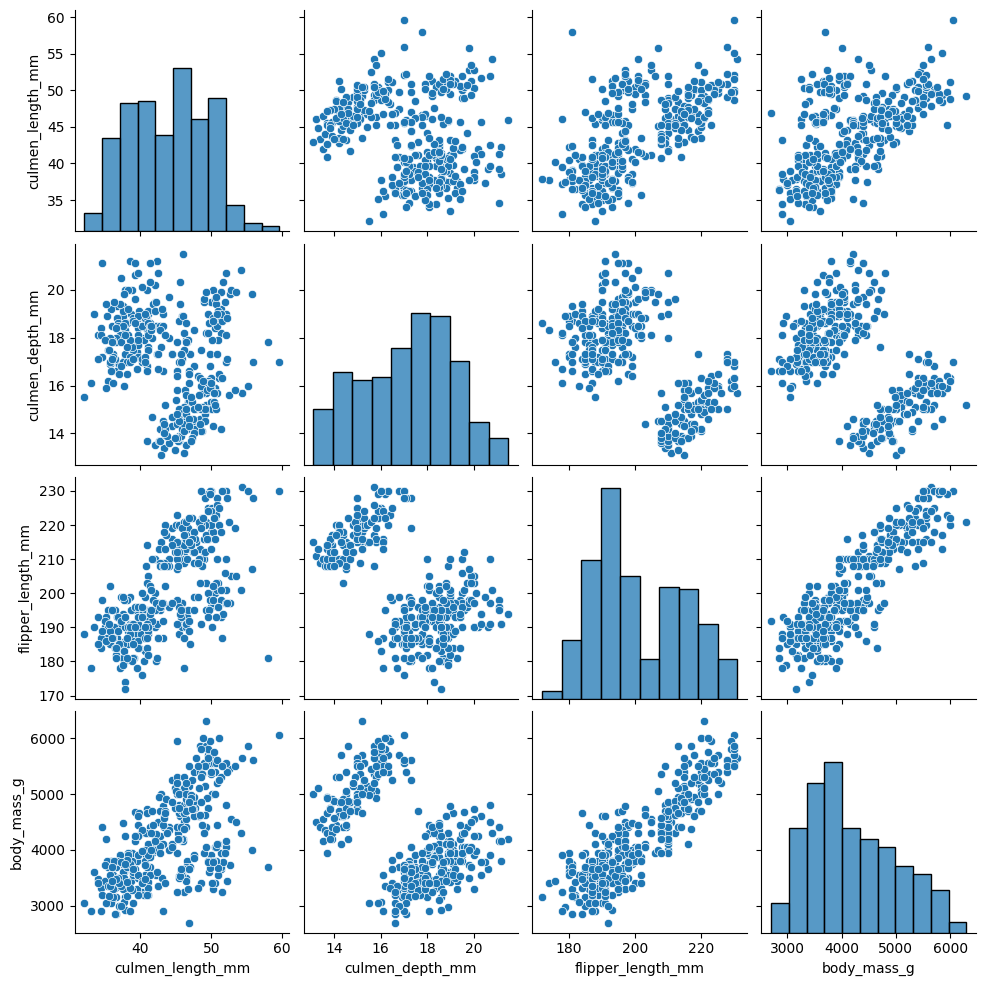

In [227]:
sn.pairplot(data)

<ipython-input-228-c5e12e609950>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr(),annot=True)


<Axes: >

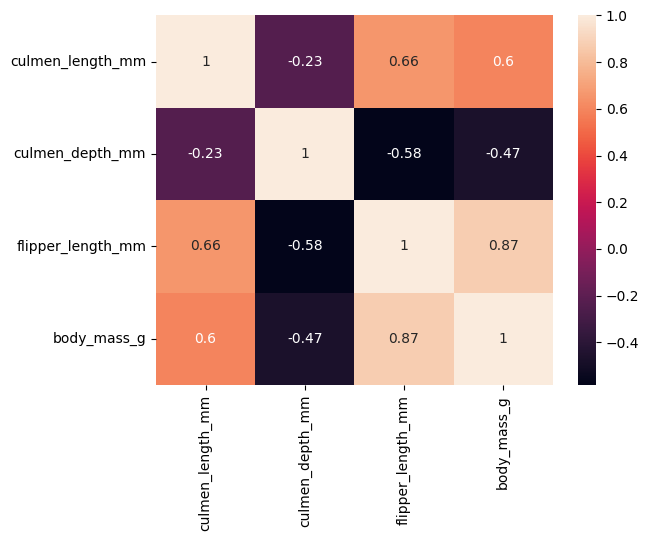

In [228]:
sn.heatmap(data.corr(),annot=True)

<Axes: ylabel='culmen_depth_mm'>

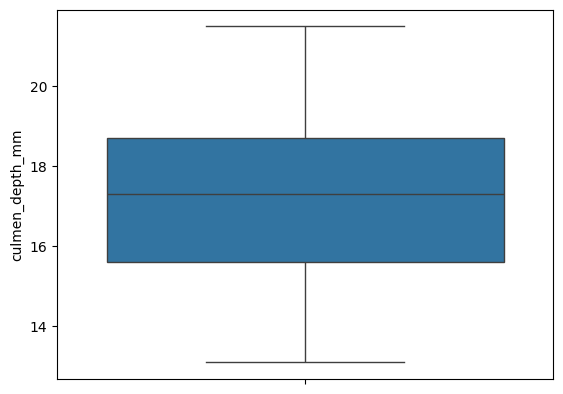

In [229]:
sn.boxplot(data['culmen_depth_mm'])

<Axes: ylabel='culmen_length_mm'>

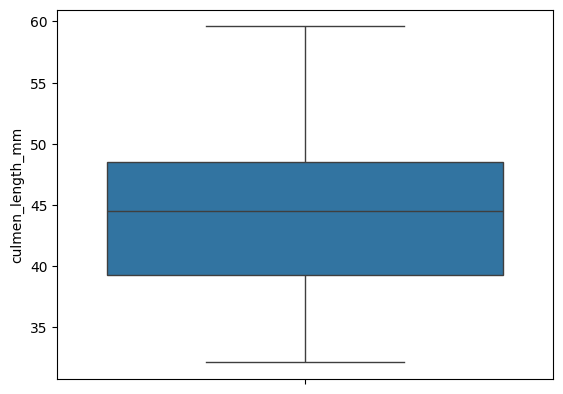

In [230]:
sn.boxplot(data['culmen_length_mm'])

<Axes: ylabel='flipper_length_mm'>

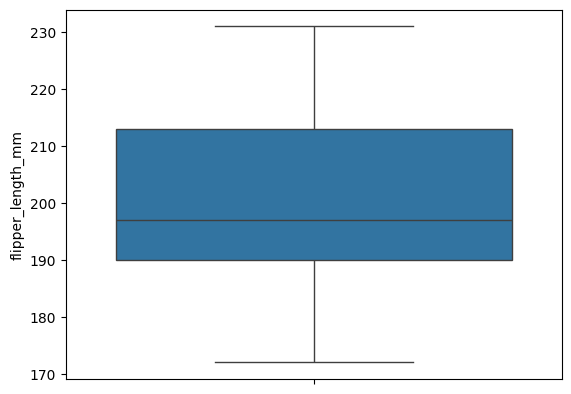

In [231]:
sn.boxplot(data['flipper_length_mm'])

<Axes: ylabel='body_mass_g'>

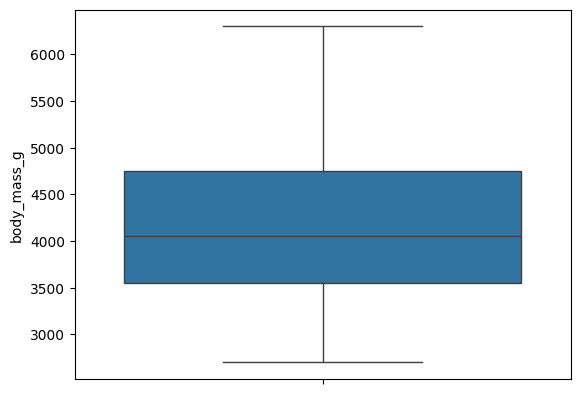

In [232]:
sn.boxplot(data['body_mass_g'])

In [233]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['species']=le.fit_transform(data['species'])
data['island']=le.fit_transform(data['island'])

<Axes: >

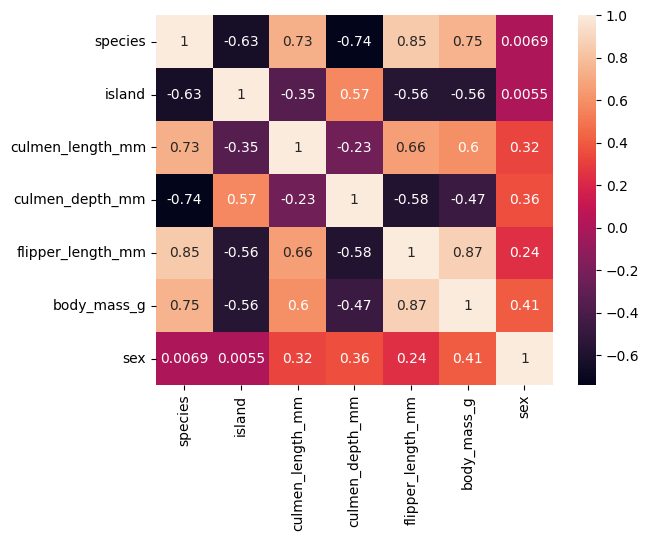

In [234]:
sn.heatmap(data.corr(),annot=True)

In [235]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


# depentend values

In [236]:
y=data.iloc[:,0]
y.head()


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [237]:
y.value_counts()

0    152
2    123
1     68
Name: species, dtype: int64

# Independent values

In [238]:
x=data.iloc[:,1::]
x.tail(20)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
323,0,49.10,15.0,228.0,5500.0,1
324,0,47.30,13.8,216.0,4725.0,1
325,0,46.80,16.1,215.0,5500.0,1
326,0,41.70,14.7,210.0,4700.0,0
327,0,53.40,15.8,219.0,5500.0,1
328,0,43.30,14.0,208.0,4575.0,0
329,0,48.10,15.1,209.0,5500.0,1
330,0,50.50,15.2,216.0,5000.0,0
331,0,49.80,15.9,229.0,5950.0,1
332,0,43.50,15.2,213.0,4650.0,0


#SCALING THE VALUES

In [239]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(x), columns = x.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [241]:
x_train.shape,x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 92 to 78
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             69 non-null     float64
 1   culmen_length_mm   69 non-null     float64
 2   culmen_depth_mm    69 non-null     float64
 3   flipper_length_mm  69 non-null     float64
 4   body_mass_g        69 non-null     float64
 5   sex                69 non-null     float64
dtypes: float64(6)
memory usage: 3.8 KB


((274, 6), None)

In [242]:
x_test.tail()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
137,0.5,0.294545,0.833333,0.474576,0.354167,1.0
49,0.5,0.370909,0.964286,0.322034,0.402778,1.0
142,0.5,0.000000,0.285714,0.271186,0.097222,0.0
208,0.5,0.476364,0.416667,0.322034,0.152778,0.0
78,1.0,0.149091,0.357143,0.254237,0.236111,0.0


In [243]:
y_train.shape,y_test.shape

((274,), (69,))

In [244]:
y_test.tail()

137    0
49     0
142    0
208    1
78     0
Name: species, dtype: int64

#BY USING LOGISTIC_REGRESSION MODEL

In [245]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [246]:
model.fit(x_train,y_train)

LogisticRegression()

In [247]:
y_predict=model.predict(x_test)
y_predict.shape

(69,)

#HERE WE CHECK THE PREDICCT VALUES AND ACTUAL TEST VALUES

In [248]:
df=pd.DataFrame({ "actual values ":y_test,"predict values":y_predict})
df.tail()

,actual values,predict values
137,0,0
49,0,0
142,0,0
208,1,1
78,0,0


In [249]:
y_predict_traind=model.predict(x_train)

# by taking random observation in test data

In [250]:
model.predict([[0.5,	0.476364,	0.416667,	0.0	,0.152778	,0.0]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# by taking the random values

In [251]:
model.predict([[ 0.9,0.417000,0.426667,0.0,0.152222,1.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

#EVALUATION OF MODEL

In [252]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#ACCURACY_SCORE FOR TEST DATA

In [253]:
accuracy_score(y_test,y_predict)

0.9855072463768116

In [254]:
accuracy_score(y_train,y_predict_traind)

0.9817518248175182

In [255]:

confusion_matrix(y_test,y_predict)

array([[36,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 19]])

In [256]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2
species,,,
0,36,0,0
1,1,13,0
2,0,0,19


In [257]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        19

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



In [258]:
13/(13+1+0)

0.9285714285714286